Daily Time Spent on Site: Tempo médio diário que o usuário passa no site em minutos.

Age: Idade do usuário.

Area Income: Renda média na área onde o usuário reside.

Daily Internet Usage: Tempo médio diário que o usuário passa usando a internet em minutos.

Ad Topic Line: Linha de assunto do anúncio que o usuário visualizou.

City: Cidade onde o usuário está localizado.

Male: Indicação de gênero do usuário (1 para masculino, 0 para feminino).

Country: País onde o usuário está localizado.

Timestamp: Data e hora em que o usuário visualizou o anúncio.

Clicked on Ad: Indicador binário se o usuário clicou no anúncio (1 para sim, 0 para não).

## importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lendo o csv

In [3]:
advertising = pd.read_csv("/content/advertising.csv")
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Info gerais

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
advertising.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

<Axes: >

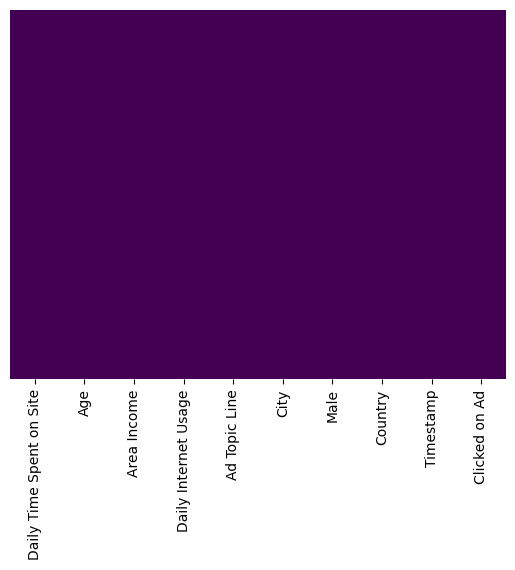

In [7]:
sns.heatmap(advertising.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [8]:
colunas_remover = ['Ad Topic Line', 'City', 'Country', 'Timestamp']
advertising = advertising.drop(columns=colunas_remover)

## Treinamento

In [9]:
X_train, X_test,y_train,y_test = train_test_split(advertising.drop(['Clicked on Ad'],axis=1), advertising["Clicked on Ad"], test_size=0.3,random_state=101)

logm = LogisticRegression()
logm.fit(X_train, y_train)


LogisticRegression()

## Predição

In [10]:
pred = logm.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



**precision**: A precisão é a proporção de verdadeiros positivos (VP) em relação ao total de classificados como positivos (soma de VP e falsos positivos, FP)

$Precision = \frac{VP}{VP + FP}$

**Recall**: Recall é a proporção de verdadeiros positivos em relação ao total de classificados como verdadeiros positivos (soma de VP e falsos negativos, FN)

$Recall = \frac{VP}{VP + FN}$

**F1-Score**: O F1-Score é uma métrica que combina precision e recall em um único número. É a média harmônica dessas duas métricas.

**Support**: A contagem real de instâncias em cada classe no conjunto de teste. Mostra quantas instâncias realmente pertencem a cada classe.

**Accuracy (Acurácia)**: A acurácia é a proporção de classificações corretas em relação ao total de instâncias.

$Acuracia = \frac{VP + VN}{VP + VN + FP + FN}$

## Matriz de confusão

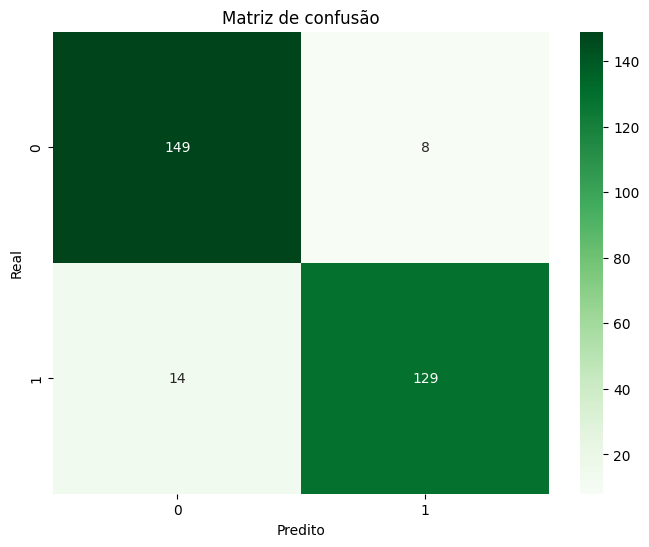

In [11]:
matriz = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()